In [2]:
import numpy.random
import umap

data = [(numpy.random.rand(768), str(n)) for n in range(100)]
points, labels = zip(*data)
mapped = umap.UMAP(n_jobs=1, random_state=42, n_components=3, metric='cosine').fit(points)

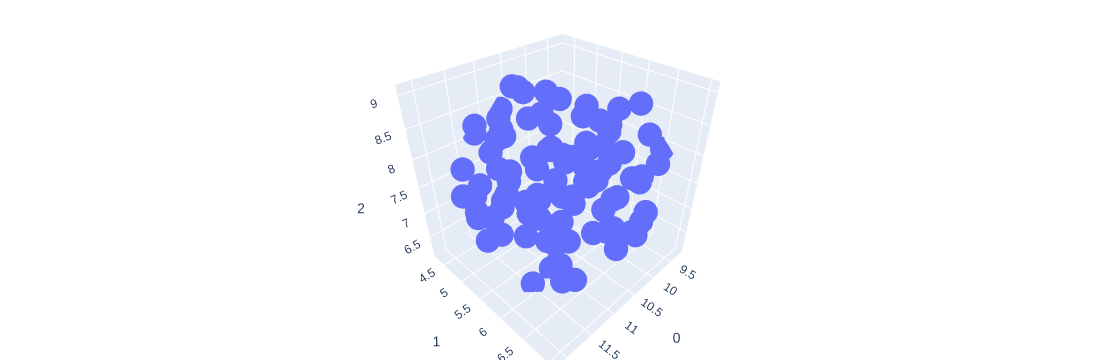

In [4]:
import plotly.express as px
fig = px.scatter_3d(mapped.embedding_, x=0, y=1, z=2, size_max=1)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

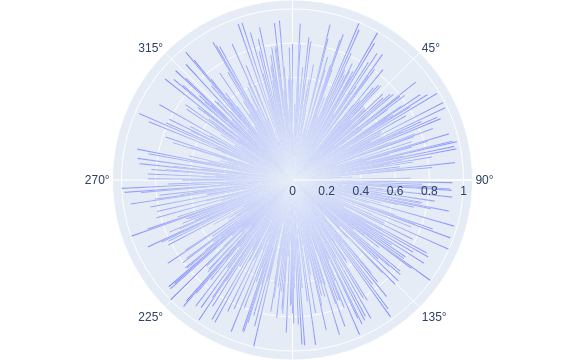

In [9]:
fig = px.bar_polar(points[0], r=0)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [8]:
text0 = "Se j'aime et sers la belle de bon hais"
text1 = "m'en voulez-vous tenir ne fol ne sot'
v0 = embed(text0)
v1 = embed(text1)
v2 = embed(text0 + '\n' + text1)
v3 = v0 + v1 

def show(v):
    norm(v)

    

In [ ]:
"""select json_extract(parent.payload, '$.title') as title,
          length(json_extract(parent.payload, '$.text')) as length,
          distance_sqeuclidean_f32(embedding, zero) as norm,
          stat.attributions as nb_attributions,
          sum(stat.utilization) / stat.attributions as utilization
   from chunk
        join document as parent on document.rowid = chunk.parent
        join document_stat as stat on stat.chunk = chunk.rowid
    group by chunk.rowid;
"""

""" select length(response_text),
           completeness,
           context_adherence
    from records
"""
df = pd.read_sql_query(sql=select(Calculations), con=connection.engine)
print(df.head())

In [ ]:
class Chunk:
    parent: Document
    
class Calculations(Base):
    __tablename__ = "calculations"
    id = Column("ID", Integer, primary_key=True)

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

EMBEDDING_MODEL_NAME = "thenlper/gte-small"

# We use a hierarchical list of separators specifically tailored for splitting Markdown documents
# This list is taken from LangChain's MarkdownTextSplitter class
MARKDOWN_SEPARATORS = [
    "\n#{1,6} ",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n___+\n",
    "\n\n",
    "\n",
    " ",
    "",
]

def split_documents(
    chunk_size: int,
    knowledge_base: List[LangchainDocument],
    tokenizer_name: Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument]:
    """
    Split documents into chunks of maximum size `chunk_size` tokens and return a list of documents.
    """
    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size / 10),
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )

    docs_processed = []

    for doc in knowledge_base:
        docs_processed += text_splitter.split_documents([doc])

    # Remove duplicates
    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(doc)
    return docs_processed_unique

docs_processed = split_documents(
    512,  # We choose a chunk size adapted to our model
    RAW_KNOWLEDGE_BASE,
    tokenizer_name=EMBEDDING_MODEL_NAME,
)

# Let's visualize the chunk sizes we would have in tokens from a common model

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(EMBEDDING_MODEL_NAME)

lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]

fig = pd.Series(lengths).hist()

plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")

plt.show()




from ragatouille import RAGPretrainedModel

RERANKER = RAGPretrainedModel.from_pretrained("colbert-ir/colbertv2.0")


    # Optionally rerank results
    if reranker:
        print("=> Reranking documents...")
        relevant_docs = reranker.rerank(question, relevant_docs, k=num_docs_final)
        relevant_docs = [doc["content"] for doc in relevant_docs]